In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path

sys.path.extend(['/data/GitHub/NeuroPy'])  # Add path to NeuroPy repository here

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.io.minianio import MinianIO
from neuropy.io.dlcio import DLC
from neuropy.core.session import ProcessData
import neuropy.io.openephysio as oeio


In [2]:
dir_use = "/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin"
sess = ProcessData(dir_use)
print(sess.recinfo)

filename: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Finn2_psilocybin_denoised.xml 
# channels: 35
sampling rate: 30000
lfp Srate (downsampled): 1250



# Import miniscope data and timestamps

First, run the session through the minian pipeline and save your S, A, and C variables to numpy arrays in a "minian" folder somewhere in the session folder

Second, designate any *corrupted files* by creating a "corrupted_videos.csv" file in the folder where your timeStamps.csv file lives. List the index to each corrupted file separated by commas. Even if you have concatenated all your videos from different recordings together in minian this file you should still put this in the file for each recording with a corrupted file.

In [3]:
# Now, load in all the video timestamps and minian data.
sess.miniscope = MiniscopeIO(sess.basepath)
sess.miniscope.load_all_timestamps()
sess.minian = MinianIO(sess.basepath / "Miniscope_combined" / "minian")

Keeping 102335 good frames found in "good_frames_bool.npy" file


In [4]:
# Show rough timestamps for all
sess.minian.times

,Frame Number,Time Stamp (ms),Buffer Index,Timestamps
4,4,207,0,2023-05-25 11:30:40.952
5,5,274,0,2023-05-25 11:30:41.019
6,6,341,0,2023-05-25 11:30:41.086
7,7,408,0,2023-05-25 11:30:41.153
8,8,476,0,2023-05-25 11:30:41.221
...,...,...,...,...
16,16,1039,0,2023-05-25 15:49:31.546
17,17,1106,0,2023-05-25 15:49:31.613
18,18,1173,0,2023-05-25 15:49:31.680
19,19,1240,0,2023-05-25 15:49:31.747


# Create sync_df DataFrame for all ephys recordings

In [5]:
sess.sync = oeio.create_sync_df(sess.basepath, sr_dat=sess.datfile.sampling_rate, sr_eeg=sess.eegfile.sampling_rate)
sess.sync

start time = 2023-05-25 11:29:42.819033-04:00
start time = 2023-05-25 12:07:50.764904-04:00
start time = 2023-05-25 13:10:53.348552-04:00
start time = 2023-05-25 14:01:56.921020-04:00


,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time
0,0,2023-05-25 11:29:42.819033-04:00,start,0,0.000000,0,0.0000
1,0,2023-05-25 11:58:16.901133-04:00,stop,51422463,1714.082100,2142602,1714.0816
2,1,2023-05-25 12:07:50.764904-04:00,start,51422464,1714.082133,2142603,1714.0824
3,1,2023-05-25 13:08:37.595804-04:00,stop,160827391,5360.913033,6701141,5360.9128
4,2,2023-05-25 13:10:53.348552-04:00,start,160827392,5360.913067,6701142,5360.9136
5,2,2023-05-25 14:00:12.102652-04:00,stop,249590015,8319.667167,10399583,8319.6664
6,3,2023-05-25 14:01:56.921020-04:00,start,249590016,8319.667200,10399584,8319.6672
7,3,2023-05-25 15:51:50.363120-04:00,stop,447393279,14913.109300,18641386,14913.1088


# Get TTLs to OE for synchronization

In [6]:
from datetime import datetime
import os
tak1_file = "/run/media/nkinsky/Nat1/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.11.17 PM.tak"
tak2_file = "/run/media/nkinsky/Nat1/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.46.32 PM.tak"
(pd.Timestamp(datetime.fromtimestamp(os.path.getmtime(tak1_file))))

Timestamp('2023-05-25 13:46:28.948677')

In [ ]:
# NRK note - check in code if timestamps between OE and optitrack match up well, otherwise chuck them and go by timestamps!

# Import DLC files

### Need to use combination of .tak creation time and nframes to get actual start time in microseconds for Finn2. Will vary for each animal!
Below has only second precision.

In [30]:
sess.dlc = DLC(sess.basepath, pix2cm=0.1)

Using tracking file #1: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.11.17 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.h5
Using tracking file #2: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.46.32 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.h5
Using tracking file #3: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 02.02.15 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.h5
Using tracking file #4: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 02.30.20 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.h5
Using tracking file #5: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 03.03.27 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.h5
Using tracking file #6: /data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 

In [31]:
sess.dlc.get_timestamps()

No Optitrack csv file found at Take 2023-05-25 01.11.17 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.
Inferring start time from file name. SECOND PRECISION IN START TIME!!!
2023-05-25 13:11:17
No Optitrack csv file found at Take 2023-05-25 01.46.32 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.
Inferring start time from file name. SECOND PRECISION IN START TIME!!!
2023-05-25 13:46:32
No Optitrack csv file found at Take 2023-05-25 02.02.15 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.
Inferring start time from file name. SECOND PRECISION IN START TIME!!!
2023-05-25 14:02:15
No Optitrack csv file found at Take 2023-05-25 02.30.20 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.
Inferring start time from file name. SECOND PRECISION IN START TIME!!!
2023-05-25 14:30:20
No Optitrack csv file found at Take 2023-05-25 03.03.27 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.
Inferr

<Axes: title={'center': 'Finn2: crown_middle'}, xlabel='lcutoff = 0.9'>

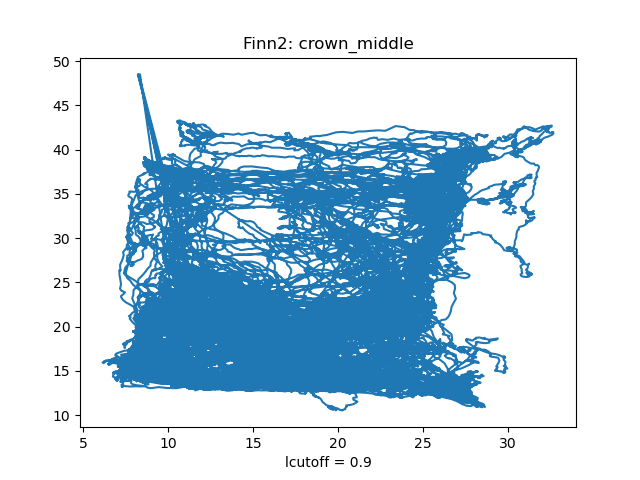

In [37]:
# Plot animal crown position for all points with confidence of 0.9 or more
_, ax = plt.subplots()
sess.dlc.plot2d(bodyparts="crown_middle", lcutoff=0.9, ax=ax)

In [44]:
sess.dlc.movie_files

[PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.11.17 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.mp4'),
 PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 01.46.32 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.mp4'),
 PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 02.02.15 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.mp4'),
 PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 02.30.20 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.mp4'),
 PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 03.03.27 PM-Camera 4 (#410110)DLC_resnet50_Psilocybin_DLCFeb13shuffle1_500000.mp4'),
 PosixPath('/data3/Psilocybin/Recording_Rats/Finn2/2023_05_25_psilocybin/Take 2023-05-25 03.34.01 PM-Camera 4 (#410110)DLC_resnet5

In [45]:
sess.dlc.pos_data

bodyparts       nose                         left_ear                        \
coords             x          y likelihood          x          y likelihood   
0          22.951747  15.335345   0.999999  20.062202  13.318683   0.958716   
1          22.936113  15.345641   0.999999  19.998354  13.249463   0.631115   
2          22.932585  15.281947   0.999999  19.900626  13.145686   0.383426   
3          22.928363  15.239330   0.999998  19.923286  13.150610   0.454644   
4          22.929221  15.259814   0.999998  19.983034  13.209230   0.611527   
...              ...        ...        ...        ...        ...        ...   
31742      16.022977  17.148935   0.988513  12.971936  19.641847   0.324461   
31743      16.011809  17.154816   0.987098  12.971411  19.661185   0.339185   
31744      16.023730  17.173909   0.990556  12.953986  19.643752   0.341088   
31745      16.012677  17.138219   0.985877  12.995496  19.687589   0.312883   
31746      16.013623  17.138702   0.991060  12.967842  19.663741   0.388685   

bodyparts  right_ear                       crown_middle  ... back_middle  \
coords             x          y likelihood            x  ...  likelihood   
0          19.193002  16.493733   0.999974    20.051152  ...    0.999999   
1          19.225056  16.439076   0.999984    20.063193  ...    0.999999   
2          19.236450  16.362129   0.999985    20.047449  ...    0.999999   
3          19.244490  16.372098   0.999979    20.045689  ...    0.999999   
4          19.249423  16.405092   0.999970    20.081511  ...    0.999999   
...              ...        ...        ...          ...  ...         ...   
31742      15.241724  19.567436   0.999748    13.157198  ...    0.998769   
31743      15.244099  19.575986   0.999677    13.171524  ...    0.998064   
31744      15.216962  19.574734   0.999607    13.163869  ...    0.998561   
31745      15.263037  19.565678   0.999737    13.151759  ...    0.997855   
31746      15.238644  19.581445   0.999702    13.160272  ...    0.998206   

bodyparts tail_base                       tail_middle                        \
coords            x          y likelihood           x          y likelihood   
0          8.430107  18.074728   0.841170    7.699252  14.763985   0.999966   
1          8.341189  18.132863   0.808811    7.707248  14.811929   0.999976   
2          8.343046  18.198531   0.758175    7.720695  14.869456   0.999975   
3          8.280968  18.186229   0.581037    7.719408  14.855589   0.999970   
4          8.421610  18.242801   0.714123    7.694149  14.877777   0.999977   
...             ...        ...        ...         ...        ...        ...   
31742      7.295419  19.612502   0.941960    9.624232  17.912239   0.388149   
31743      7.321642  19.606668   0.902954    9.587274  17.896573   0.325301   
31744      7.319665  19.656641   0.939157    9.590099  17.870978   0.439022   
31745      7.304562  19.620784   0.923977    9.615859  17.888933   0.340629   
31746      7.335188  19.609184   0.935712    9.618991  17.907619   0.499036   

bodyparts   tail_end                        
coords             x          y likelihood  
0           7.216440  17.125273   0.017876  
1           7.169278  17.178145   0.008285  
2           7.143501  17.227095   0.006189  
3           7.114997  17.189815   0.004747  
4           7.149866  17.243159   0.005135  
...              ...        ...        ...  
31742      10.352755  38.848584   0.024404  
31743      10.332191  38.890533   0.032703  
31744      10.339568  38.821902   0.018163  
31745      10.321335  38.841382   0.023245  
31746      10.461295  38.816623   0.037241  

[434055 rows x 27 columns]

get_speed not yet tested for optitrack data, use with caution
get_speed not yet tested for optitrack data, use with caution


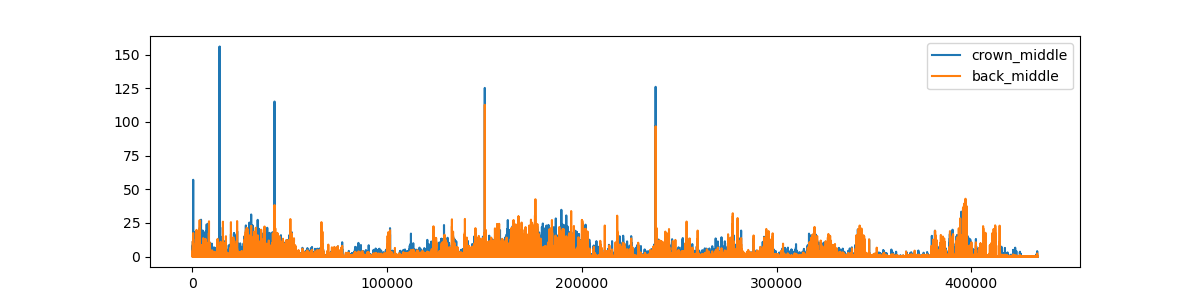

In [42]:
# Now plot speed data
%matplotlib widget
sess.dlc.smooth_pos()
crown_speed = sess.dlc.get_speed(bodypart="crown_middle")
mid_back_speed = sess.dlc.get_speed(bodypart="back_middle")
_, ax = plt.subplots(figsize=(12, 3))
ax.plot(crown_speed, label="crown_middle")
ax.plot(mid_back_speed, label="back_middle")
ax.legend()

### Finally interpolate all the times to eeg times

In [16]:
sync_sec = (sess.sync['Datetime'] - sess.sync['Datetime'][0]).dt.total_seconds()
dlc_sec_from_oe_start = (sess.dlc.timestamps["Timestamps"] - sess.sync['Datetime'][0]).dt.total_seconds()
eeg_timestamps = np.interp(dlc_sec_from_oe_start, sync_sec, sess.sync["eeg_time"].values)


In [17]:
good_bool = np.zeros_like(eeg_timestamps, dtype="bool")
for rec in sess.sync["Recording"].unique():
    rec_df = sess.sync[sess.sync["Recording"] == rec]
    bool_temp = (eeg_timestamps >= rec_df.loc[rec_df.Condition == "start", "eeg_time"].values[0]) & (eeg_timestamps <= rec_df.loc[rec_df.Condition == "stop", "eeg_time"].values[0])
    good_bool = good_bool | bool_temp

eeg_timestamps[~good_bool] = np.nan

(1700.0, 1800.0)

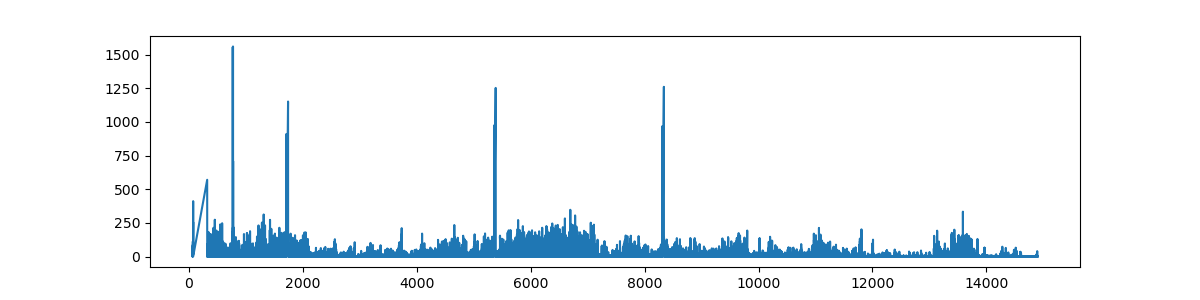

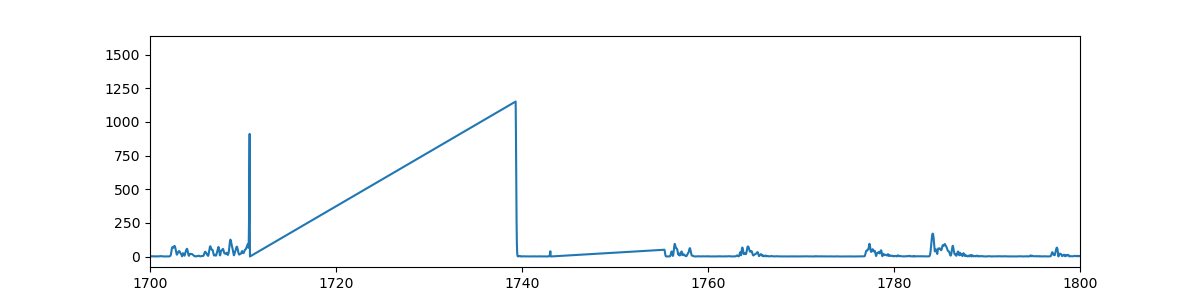

In [18]:
# Now plot again - should see gaps in speed where recording stops that should be ignored
_, ax = plt.subplots(figsize=(12, 3))
ax.plot(eeg_timestamps, crown_speed)

_, ax = plt.subplots(figsize=(12, 3))
ax.plot(eeg_timestamps, crown_speed)
ax.set_xlim((1700, 1800))

# Plan for alignment
designate each recording session in `epochs`, then have an `align_by` flag that will either align by TTL or by timestamps or, in the case of oe and position, align by theta v speed.  Also, for some sessions I have an input from the miniscope to Intan that I can use.

Since some epochs will have a TTL at the start but not later on after a disconnect, you will need to either a) fake a "disconnect" event and only use the TTL if there is an off-on transition after the disconnect, or b) just search for the closet TTL PRIOR to each timestamp to figure out how to align it.  Function would look identify a range of times and then flag them as either "align_by_timestamps" or "align_by_TTL" or "align_by_theta" (position to oe only) or "MS_to_oe_TTL".

# Options for alignment

## 1) TTL - digital or analog?

## 2) Timestamps - currently not accurate enough

## 3) theta as a backup

# Read in DLC pos data and sync with Optitrack timestamps